<a href="https://colab.research.google.com/github/maadmaaax/Project_NBA_GroupM/blob/main/Analyse_Principale.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Data Import clean and Merge**

In [1]:
!pip install requests beautifulsoup4 pandas #requestsfetches the page,beautifulsoup4finds the data on the page, andpandas` organizes it into a table.

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import numpy as np
import statsmodels.api as sm
from pandas.plotting import table
from google.colab import files
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.cm as cm

#Importing all the packages we will use

In [3]:
!git clone https://github.com/maadmaaax/Project_NBA_GroupM
#Load Player stat data set
rs2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2005.csv')
rs2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2006.csv')
rs2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2007.csv')
rs2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2008.csv')
rs2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2009.csv')
rs2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2010.csv')
rs2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2011.csv')
rs2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2012.csv')
rs2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2013.csv')
rs2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2014.csv')
rs2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2015.csv')
rs2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2016.csv')
rs2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2017.csv')
rs2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2018.csv')
rs2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2019.csv')
rs2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2020.csv')
rs2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2021.csv')
rs2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2022.csv')
rs2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2023.csv')
rs2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2024.csv')
rs2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2025.csv')
rs2026=pd.read_csv('Project_NBA_GroupM/Data/Raw/rs2026.csv')
#Load teams result data sets
st2005=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2005.csv')
st2006=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2006.csv')
st2007=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2007.csv')
st2008=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2008.csv')
st2009=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2009.csv')
st2010=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2010.csv')
st2011=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2011.csv')
st2012=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2012.csv')
st2013=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2013.csv')
st2014=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2014.csv')
st2015=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2015.csv')
st2016=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2016.csv')
st2017=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2017.csv')
st2018=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2018.csv')
st2019=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2019.csv')
st2020=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2020.csv')
st2021=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2021.csv')
st2022=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2022.csv')
st2023=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2023.csv')
st2024=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2024.csv')
st2025=pd.read_csv('Project_NBA_GroupM/Data/Raw/st2025.csv')

fatal: destination path 'Project_NBA_GroupM' already exists and is not an empty directory.


In [4]:
#Changing full team name to 3letter code to keep consistent with the rs dataset
# +Making sure to update team name to their current one
team_replacements = {
    "Atlanta Hawks": "ATL",
    "Boston Celtics": "BOS",
    "Brooklyn Nets": "BRK",
    "New Jersey Nets": "BRK",
    "NJN":"BRK",
    "Charlotte Hornets": "CHO",
    "Charlotte Bobcats": "CHO",
    "CHA":"CHO",
    "Chicago Bulls": "CHI",
    "Cleveland Cavaliers": "CLE",
    "Dallas Mavericks": "DAL",
    "Denver Nuggets": "DEN",
    "Detroit Pistons": "DET",
    "Golden State Warriors": "GSW",
    "Houston Rockets": "HOU",
    "Indiana Pacers": "IND",
    "Los Angeles Clippers": "LAC",
    "Los Angeles Lakers": "LAL",
    "Memphis Grizzlies": "MEM",
    "Miami Heat": "MIA",
    "Milwaukee Bucks": "MIL",
    "Minnesota Timberwolves": "MIN",
    "New Orleans Pelicans": "NOP",
    "New Orleans Hornets": "NOP",
    "NOH": "NOP",
    "New Orleans/Oklahoma City Hornets": "NOP",
    "NOK": "NOP",
    "New York Knicks": "NYK",
    "Oklahoma City Thunder": "OKC",
    "Seattle SuperSonics": "OKC",
    "SEA": "OKC",
    "Orlando Magic": "ORL",
    "Philadelphia 76ers": "PHI",
    "Phoenix Suns": "PHO",
    "Portland Trail Blazers": "POR",
    "Sacramento Kings": "SAC",
    "San Antonio Spurs": "SAS",
    "Toronto Raptors": "TOR",
    "Utah Jazz": "UTA",
    "Washington Wizards": "WAS"
}

Dropst=['E','Apr','A','C','SE','NW','P','SW','Post','Pre','Oct','Nov','Dec','Jan','Feb','Mar','Jul','Aug','May']
Droprs=['2TM','3TM','TOT','5TM','4TM','nan']
years = range(2005, 2026)

for year in years:
    df_name = f'st{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df=df.drop(columns=Dropst,errors='ignore')
        # Create Win and loss as column and compute %
        df[['W','L']]=df['Overall'].str.split('-',expand=True).astype(int)
        df['W%']=df['W']/(df['L']+df['W'])

        df[['HW','HL']]=df['Home'].str.split('-',expand=True).astype(int)
        df['HW%']=df['HW']/(df['HL']+df['HW'])

        df[['RW','RL']]=df['Road'].str.split('-',expand=True).astype(int)
        df['RW%']=df['RW']/(df['RL']+df['RW'])



        globals()[df_name] = df

#Changing old team name to recent one for consistency
for year in years:
    df_name = f'rs{year}'
    if df_name in globals():
        df = globals()[df_name]
        # Strip spaces and replace team names in the relevant column
        df['Team'] = df['Team'].str.strip().replace(team_replacements)
        df = df[~df.isin(Droprs)]
        df['MVP']=df['Awards'].str.contains('MVP',na=False).astype(int)
        df['ALLNBA']=df['Awards'].str.contains('NBA',na=False).astype(int)
        df['DPOY']=df['Awards'].str.contains('DEF|DPOY',na=False).astype(int)
        # Save back to variable
        globals()[df_name] = df


In [5]:
# --- Exploring Dataframes one by one ---

# 1. Create a dictionnary to associate Dataframes names
# C'est plus propre pour l'affichage que d'utiliser la liste
dfs_dict = {
    "rs2005": rs2005, "rs2006": rs2006, "rs2007": rs2007, "rs2008": rs2008,
    "rs2009": rs2009, "rs2010": rs2010, "rs2011": rs2011, "rs2012": rs2012,
    "rs2013": rs2013, "rs2014": rs2014, "rs2015": rs2015, "rs2016": rs2016,
    "rs2017": rs2017, "rs2018": rs2018, "rs2019": rs2019, "rs2020": rs2020,
    "rs2021": rs2021, "rs2022": rs2022, "rs2023": rs2023, "rs2024": rs2024,
    "rs2025": rs2025
}
sts_dict = {
    "st2005": st2005, "st2006": st2006, "st2007": st2007, "st2008": st2008,
    "st2009": st2009, "st2010": st2010, "st2011": st2011, "st2012": st2012,
    "st2013": st2013, "st2014": st2014, "st2015": st2015, "st2016": st2016,
    "st2017": st2017, "st2018": st2018, "st2019": st2019, "st2020": st2020,
    "st2021": st2021, "st2022": st2022, "st2023": st2023, "st2024": st2024,
    "st2025": st2025
}

#print("--- Starting the analysis of each seasons ---")

# 2. Loop on each pair (name, DataFrame) in the dictionnairy
for name, df in dfs_dict.items():

    #print(f"\n=========================================")
    #print(f" ANALYSIS of : {name}")
    #print(f"=========================================")

    # 1. Display the Shape (Dimensions)
    # df.shape[0] = lignes, df.shape[1] = columns (variables)
    #print(f"Dimensions : {df.shape[0]} lines, {df.shape[1]} variables (columns)")

    # 2. Verify the values NaN
    # .isnull() creates a DF of booleans (True si NaN)
    # .sum() is the sum per column
    # .sum() a second sum for the total sum
    total_nan = df.isnull().sum().sum()

    # if total_nan == 0:
        # print(" Good news : No NaN values were found.")
   #  else:
        #  If there is any NaN values, we want to know where
        #  print(f" ATTENTION : {total_nan} NaN Values in total were found !")

        # We create a serie of 'nan_per_column' that count the NaN per column
    nan_per_column = df.isnull().sum()

        # We print only the column that really have NaN
       # print("Infos of NaN per column :")
       # print(nan_per_column[nan_per_column > 0])

    #print("-" * 40)

#print("\n--- End of the analysis ---")



In [6]:
# ---Display to see how a dataframes looks like from our database. For example 2005
#display(st2005)

In [7]:
#---Combine every seasons from 2005 to 2025 to determine score max & score min
#for every variable that are useful in our analysis

# 1. Merge all df in a list
all_dfs_list = [
    rs2005, rs2006, rs2007, rs2008, rs2009, rs2010,
    rs2011, rs2012, rs2013, rs2014, rs2015, rs2016,
    rs2017, rs2018, rs2019, rs2020, rs2021, rs2022,
    rs2023, rs2024, rs2025
]
all_sts_list = [
    st2005, st2006, st2007, st2008, st2009, st2010,
    st2011, st2012, st2013, st2014, st2015, st2016,
    st2017, st2018, st2019, st2020, st2021, st2022,
    st2023, st2024, st2025
]

#We concat all in one big Dataframe
#and we add 'season' column
season = 2005
for df in all_dfs_list:
  df['Season'] = season
  season += 1

season = 2005
for df in all_sts_list:
  df['Season'] = season
  season += 1

sts_data_full = pd.concat(all_sts_list, ignore_index=True)
sts_data_full=sts_data_full.drop(columns=Dropst,errors='ignore')
nbas_data_full = pd.concat(all_dfs_list, ignore_index=True)
nbas_data_full=nbas_data_full[~nbas_data_full.isin(Droprs)]

nbas_data_full.to_csv('Project_NBA_GroupM/Data/Raw/nbas_data_full.csv',index=False)
#print("All seasons combined")
##print(nbas_data_full.shape)
#display(sts_data_full.tail(50))

In [8]:
df = nbas_data_full

# Ensure Season is numeric and sorted properly
df['Season'] = pd.to_numeric(df['Season'], errors='coerce')

# Sort by player and season so "previous season" is well-defined
df = df.sort_values(['Player', 'Season'])

award_cols = ['ALLNBA', 'MVP', 'DPOY']
exclude = ['MVP-10', 'MVP-11', 'MVP-12', 'MVP-13', 'MVP-14',
           'DPOY-15', 'DPOY-16', 'DPOY-17', 'DPOY-10', 'DPOY-11',
           'DPOY-12', 'DPOY-13', 'DPOY-14']


df['exclude'] = df['Awards'].str.contains('|'.join(exclude), na=False)

# TMVP = 1 only if has MVP-1 AND not excluded
df['TMVP'] = (
    df['Awards'].str.contains('MVP-1', na=False) &  # MVP-1 present
    ~df['exclude']                                  # exclude is False
).astype(int)
df['TDPOY'] = (
    df['Awards'].str.contains('DPOY-1', na=False) &  # MVP-1 present
    ~df['exclude']                                  # exclude is False
).astype(int)
for col in award_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Create lagged award indicators by player
df['ALL-NBA-1'] = df.groupby('Player')['ALLNBA'].shift(1).fillna(0).astype(int)
df['MVP-1']     = df.groupby('Player')['MVP'].shift(1).fillna(0).astype(int)
df['DPOY-1']    = df.groupby('Player')['DPOY'].shift(1).fillna(0).astype(int)
df['TMVP-1']     = df.groupby('Player')['TMVP'].shift(1).fillna(0).astype(int)
df['TDPOY-1']    = df.groupby('Player')['TDPOY'].shift(1).fillna(0).astype(int)
df['TS%']=(df['PTS'])/(2*df['FGA']+0.44*df['FTA'])
df = df.fillna(0)
nbas_data_full= df

In [9]:
# Remove the row where 'Rk' is 'League Average'
nbas_data_full = nbas_data_full[nbas_data_full['Rk'] != 'League Average'].copy()

# List of columns that should be numerical (excluding Player, Team, Pos, Awards, Player-additional)
numerical_cols = ['Rk', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

# Convert numerical columns to numeric, coercing errors to NaN
for col in numerical_cols:
    nbas_data_full[col] = pd.to_numeric(nbas_data_full[col], errors='coerce')

# Drop rows with NaN values in the numerical columns
nbas_data_full.dropna(subset=numerical_cols, inplace=True)

#print("DataFrame after removing rows with missing or non-numerical values in specified columns:")
print(nbas_data_full.shape)
display(nbas_data_full.head())
print(sts_data_full.shape)
display(sts_data_full.head())

(13313, 45)


,Rk,Player,Age,Team,Pos,G,GS,MP,FG,FGA,...,Season,exclude,TMVP,TDPOY,ALL-NBA-1,MVP-1,DPOY-1,TMVP-1,TDPOY-1,TS%
11657,391.0,A.J. Green,23.0,MIL,SG,35.0,1.0,9.9,1.5,3.6,...,2023,False,0,0,0,0,0,0,0,0.607399
12313,363.0,A.J. Green,24.0,MIL,SG,56.0,0.0,11.0,1.5,3.5,...,2024,False,0,0,0,0,0,0,0,0.630959
12915,276.0,A.J. Green,25.0,MIL,SG,73.0,7.0,22.7,2.5,5.8,...,2025,False,0,0,0,0,0,0,0,0.628397
7566,438.0,A.J. Hammons,24.0,DAL,C,22.0,0.0,7.4,0.8,1.9,...,2017,False,0,0,0,0,0,0,0,0.524309
11701,427.0,A.J. Lawson,22.0,0,SG,15.0,0.0,7.2,1.5,2.9,...,2023,False,0,0,0,0,0,0,0,0.614618


(630, 17)


,Rk,Team,Overall,Home,Road,W,≤3,≥10,L,W%,HW,HL,HW%,RW,RL,RW%,Season
0,1,PHO,62-20,31-10,31-10,62,7-2,36-8,20,0.756098,31,10,0.756098,31,10,0.756098,2005
1,2,MIA,59-23,35-6,24-17,59,7-8,33-6,23,0.719512,35,6,0.853659,24,17,0.585366,2005
2,3,SAS,59-23,38-3,21-20,59,9-7,40-5,23,0.719512,38,3,0.926829,21,20,0.512195,2005
3,4,DAL,58-24,29-12,29-12,58,8-4,28-10,24,0.707317,29,12,0.707317,29,12,0.707317,2005
4,5,DET,54-28,32-9,22-19,54,8-8,26-14,28,0.658537,32,9,0.780488,22,19,0.536585,2005


In [10]:
#Saving cleaned data set directly on computer. The code begin with ## to prevent them being downloaded everytime



##nbas_data_full.to_csv('nbas_data_full.csv', index=False)
##sts_data_full.to_csv('sts_data_full.csv', index=False)


##files.download('nbas_data_full.csv')
##files.download('sts_data_full.csv')

In [11]:
print(nbas_data_full.head(20))

          Rk        Player   Age Team Pos     G    GS    MP   FG  FGA  ...  \
11657  391.0    A.J. Green  23.0  MIL  SG  35.0   1.0   9.9  1.5  3.6  ...   
12313  363.0    A.J. Green  24.0  MIL  SG  56.0   0.0  11.0  1.5  3.5  ...   
12915  276.0    A.J. Green  25.0  MIL  SG  73.0   7.0  22.7  2.5  5.8  ...   
7566   438.0  A.J. Hammons  24.0  DAL   C  22.0   0.0   7.4  0.8  1.9  ...   
11701  427.0   A.J. Lawson  22.0    0  SG  15.0   0.0   7.2  1.5  2.9  ...   
11702  427.0   A.J. Lawson  22.0  MIN  SG   1.0   0.0   2.0  1.0  1.0  ...   
11703  427.0   A.J. Lawson  22.0  DAL  SG  14.0   0.0   7.6  1.5  3.1  ...   
12424  443.0   A.J. Lawson  23.0  DAL  SG  42.0   0.0   7.4  1.3  2.9  ...   
12835  218.0   A.J. Lawson  24.0  TOR  SG  26.0   2.0  18.7  3.1  7.3  ...   
3129   230.0    A.J. Price  23.0  IND  PG  56.0   2.0  15.4  2.6  6.3  ...   
3744   240.0    A.J. Price  24.0  IND  PG  50.0   0.0  15.9  2.3  6.4  ...   
4439   342.0    A.J. Price  25.0  IND  PG  44.0   1.0  12.9  1.3

## **Visual Modeling**

In [47]:



# Load data
nbas =nbas_data_full

# 1. Choose predictor columns (example set, adjust as needed)
num_cols = [
    'FG%','FT%','TRB','STL','BLK',
  'FT','TOV','MVP-1','DPOY-1',
    'ALL-NBA-1'
]
use_cols = [c for c in num_cols if c in nbas.columns]

# 2. Keep only numeric, drop missing rows
X = nbas[use_cols].apply(pd.to_numeric, errors='coerce').dropna()

# 3. Optionally standardize (not required for VIF, but fine if you want)
# from sklearn.preprocessing import StandardScaler
# X = pd.DataFrame(StandardScaler().fit_transform(X), columns=X.columns)

# 4. Compute VIF for each column
vif_df = pd.DataFrame({
    'variable': X.columns,
    'VIF': [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
})

print(vif_df.sort_values('VIF', ascending=False))


    variable        VIF
0        FG%  10.452866
6        TOV   9.791041
1        FT%   9.703119
2        TRB   8.646970
5         FT   6.178925
3        STL   5.804460
4        BLK   3.690185
9  ALL-NBA-1   3.074592
7      MVP-1   2.959022
8     DPOY-1   1.241857


Test R²: 0.4360

Top 10 Features:
              Stat  Importance
27  ALL-NBA-1_norm    0.276584
20        TOV_norm    0.112893
2         FG%_norm    0.092329
1         FGA_norm    0.053403
19        BLK_norm    0.042346
26     DPOY-1_norm    0.028879
10         FT_norm    0.028386
18        TS%_norm    0.028045
12        FT%_norm    0.026997
11        FTA_norm    0.025992


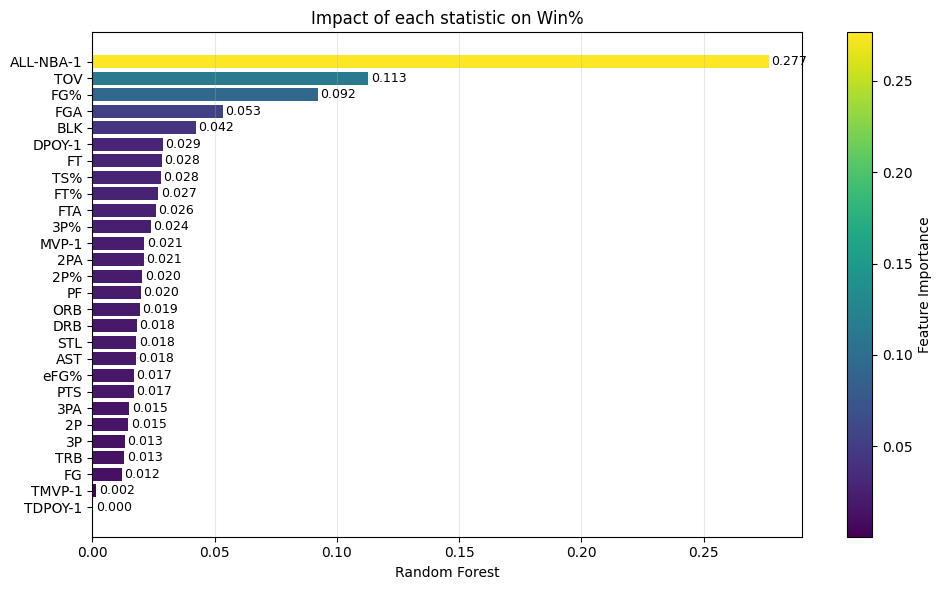

In [43]:
def run_random_forest_analysis():
    """Complete Random Forest analysis pipeline"""

    # Data prep (same as above)
    nbas_df = nbas_data_full.copy() # Use a copy to avoid modifying the global DataFrame unexpectedly
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    stat_cols = ['FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL','TS%',
                 'BLK', 'TOV', 'PF', 'PTS','TMVP-1','TDPOY-1','MVP-1','DPOY-1','ALL-NBA-1']

    # Normalize
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)

    # Aggregate & merge
    team_stats = nbas_df.groupby(['Team', 'Season'])[[f'{col}_norm' for col in stat_cols]].mean().reset_index()
    sts_df = sts_data_full.copy() # Use a copy
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(sts_df[['Team', 'Season', 'W%']], on=['Team', 'Season'])

    X = merged_df[[f'{col}_norm' for col in stat_cols]].fillna(0)
    y = merged_df['W%'].fillna(0)

    # Train RF
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=10)
    rf.fit(X_train, y_train)

    # Results
    importances = pd.DataFrame({
        'Stat': [f'{col}_norm' for col in stat_cols],
        'Importance': rf.feature_importances_
    }).sort_values('Importance', ascending=False)

    print(f"Test R²: {rf.score(X_test, y_test):.4f}")
    print("\nTop 10 Features:")
    print(importances.head(10))

    return rf, importances

# Run complete analysis
model, importances = run_random_forest_analysis()


top_n = 30
imp_sorted = importances.sort_values('Importance', ascending=True).tail(top_n).copy()
imp_sorted['Stat_clean'] = imp_sorted['Stat'].str.replace('_norm', '', regex=False)

values = imp_sorted['Importance'].values
norm = (values - values.min()) / (values.max() - values.min() + 1e-9)
colors = cm.viridis(norm)  # choose any cmap: viridis, plasma, coolwarm, etc.

fig, ax = plt.subplots(figsize=(10, 6)) # Explicitly create figure and axes
bars = ax.barh(imp_sorted['Stat_clean'], imp_sorted['Importance'], color=colors)
ax.set_xlabel('Random Forest')
ax.set_title(f'Impact of each statistic on Win%')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(
        width + 0.001, bar.get_y() + bar.get_height()/2,
        f'{width:.3f}', va='center', fontsize=9
    )

# Optional colorbar
sm = plt.cm.ScalarMappable(cmap=cm.viridis,
                           norm=plt.Normalize(vmin=values.min(), vmax=values.max()))
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax) # Pass the axes to the figure's colorbar method
cbar.set_label('Feature Importance')

plt.tight_layout()
plt.show()

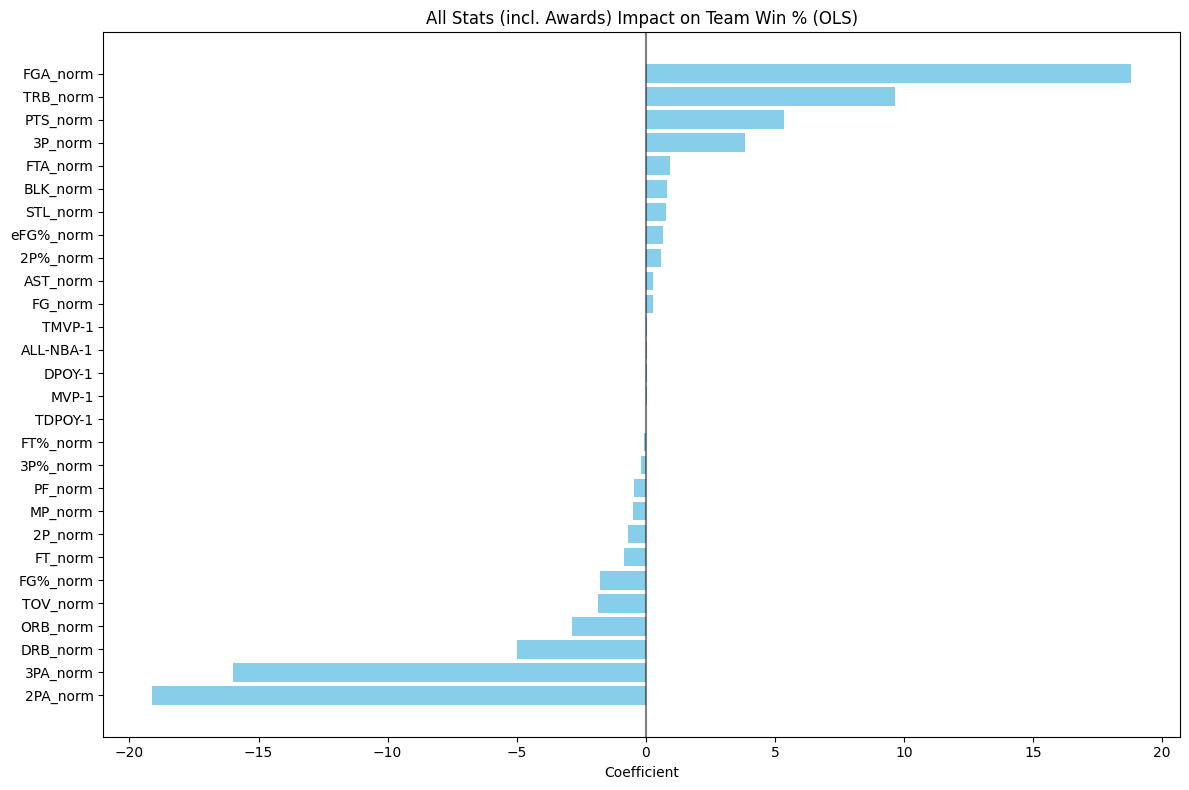

                            OLS Regression Results                            
Dep. Variable:                     W%   R-squared:                       0.589
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     30.75
Date:                Wed, 17 Dec 2025   Prob (F-statistic):           3.53e-97
Time:                        01:20:48   Log-Likelihood:                 578.65
No. Observations:                 630   AIC:                            -1099.
Df Residuals:                     601   BIC:                            -970.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.1015      0.153      7.206      0.0

In [53]:
def run_team_regression_sm():
    # Re-import statsmodels.api as sm to ensure 'sm' refers to the correct module
    import statsmodels.api as sm

    # Load & filter
    nbas_df = nbas_data_full.copy()
    nbas_df['MP'] = pd.to_numeric(nbas_df['MP'], errors='coerce')
    nbas_df = nbas_df[nbas_df['MP'] >= 5].copy()

    # Base numeric stats
    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']

    # Ensure numeric
    for col in stat_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce')

    # Award dummies (no normalization)
    award_cols = ['MVP-1', 'DPOY-1', 'ALL-NBA-1','TMVP-1','TDPOY-1']
    for col in award_cols:
        nbas_df[col] = pd.to_numeric(nbas_df[col], errors='coerce').fillna(0).astype(int)

    # Normalize core stats (0–1)
    for col in stat_cols:
        min_val, max_val = nbas_df[col].min(), nbas_df[col].max()
        if max_val > min_val:
            nbas_df[f'{col}_norm'] = (nbas_df[col] - min_val) / (max_val - min_val)
        else:
            nbas_df[f'{col}_norm'] = 0.0

    # Aggregate to team-season
    agg_dict = {f'{col}_norm': 'mean' for col in stat_cols}
    agg_dict.update({col: 'max' for col in award_cols})  # 1 if any player has the award

    team_stats = (
        nbas_df
        .groupby(['Team', 'Season'])
        .agg(agg_dict)
        .reset_index()
    )

    # Merge with W%
    sts_df = sts_data_full.copy()
    sts_df['W%'] = pd.to_numeric(sts_df['W%'], errors='coerce')
    merged_df = team_stats.merge(
        sts_df[['Team', 'Season', 'W%']],
        on=['Team', 'Season']
    )

    # Features: normalized stats + award dummies
    feat_norm = [f'{col}_norm' for col in stat_cols]
    feat_awards = award_cols
    feature_cols = feat_norm + feat_awards

    X = merged_df[feature_cols].fillna(0)
    y = merged_df['W%'].fillna(0)

    # Add intercept and fit OLS
    X_sm = sm.add_constant(X)
    ols_model = sm.OLS(y, X_sm).fit()

    # Coefficients table (exclude intercept for bar plot)
    coefs = (
        pd.DataFrame({
            'Stat': ['const'] + feature_cols,
            'Coefficient': ols_model.params.values
        })
        .set_index('Stat')
    )

    coefs_no_const = coefs.drop(index='const').sort_values('Coefficient')

    # Plot coefficients
    plt.figure(figsize=(12, 8))
    plt.barh(range(len(coefs_no_const)), coefs_no_const['Coefficient'], color='skyblue')
    plt.yticks(range(len(coefs_no_const)), coefs_no_const.index)
    plt.xlabel('Coefficient')
    plt.title('All Stats (incl. Awards) Impact on Team Win % (OLS)')
    plt.axvline(x=0, color='black', alpha=0.5)
    plt.tight_layout()
    plt.show()

    return ols_model, coefs

ols_model, coefficients = run_team_regression_sm()
print(ols_model.summary())

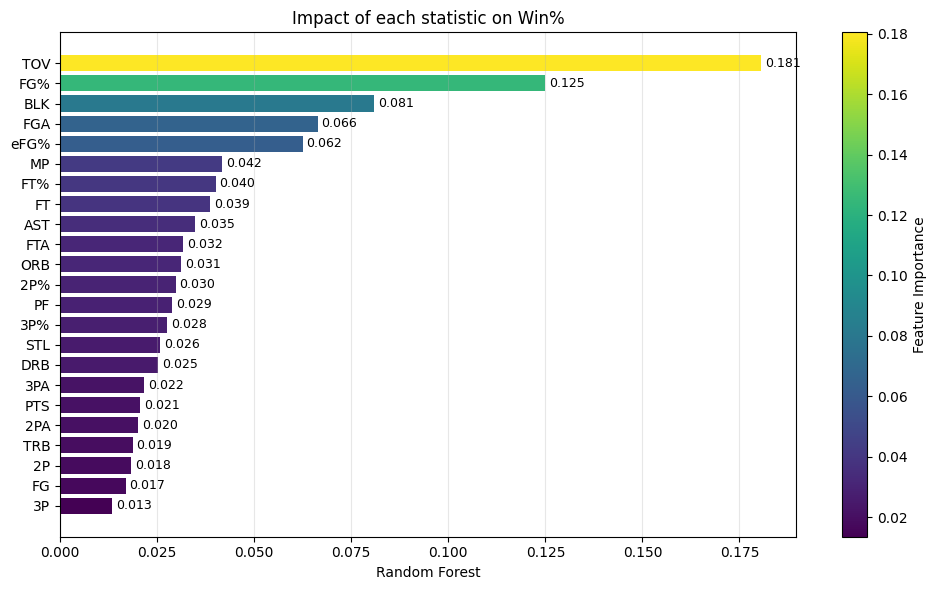

## **Modeling Prediction**

In [33]:
nbas_df =nbas_data_full
rs_df = pd.read_csv("Project_NBA_GroupM/Data/Raw/rs2026.csv", sep=';')



# Get all column names from nbas_df (to replicate exactly)
all_columns = nbas_df.columns.tolist()


# Create 2026 roster template with ALL columns matching nbas_df
roster_2026 = rs_df[['Player']].copy()
roster_2026['Team_2026'] = rs_df['Team_2026']
roster_2026['Season'] = 2026

# Set Age to last known age +1 for players in historical data
last_age = nbas_df.groupby('Player')['Age'].max().reset_index()
roster_2026 = roster_2026.merge(last_age, on='Player', how='left')
roster_2026['Age'] = roster_2026['Age'].fillna(20).astype(int) + 1  # Default 25+1 for rookies

# Set Pos to most common position (or default)
last_pos = nbas_df.groupby('Player')['Pos'].agg(lambda x: x.mode()[0] if not x.mode().empty else 'SF').reset_index()
roster_2026 = roster_2026.merge(last_pos, on='Player', how='left')
roster_2026['Pos'] = roster_2026['Pos'].fillna('SF')

# Fill ALL columns with 0 or NaN to match nbas_df structure
for col in all_columns:
    if col not in ['Player', 'Season', 'Age', 'Pos', 'Team_2026']:
        if col in ['Rk', 'Player-additional', 'Awards']:
            roster_2026[col] = np.nan
        else:
            roster_2026[col] = 0

# Rename Team_2026 to Team to match structure
roster_2026['Team'] = roster_2026['Team_2026']
roster_2026.drop('Team_2026', axis=1, inplace=True)

# **CRITICAL: Calculate awards logic exactly matching nbas_df structure**
# Get 2025 data for award calculations
nbas_2025 = nbas_df[nbas_df['Season'] == 2025]

# For each roster player, get their 2025 stats (if they played)
def get_2025_awards(player_name):
    player_2025 = nbas_2025[nbas_2025['Player'] == player_name]
    if player_2025.empty:
        return {'MVP': 0, 'DPOY': 0, 'ALLNBA': 0, 'MVP-1': 0, 'DPOY-1': 0, 'ALL-NBA-1': 0}

    row = player_2025.iloc[0]
    return {
        'MVP': int(row.get('MVP', 0) >= 1),      # Current year nomination (2025 -> 2026 MVP)
        'DPOY': int(row.get('DPOY', 0) >= 1),    # Current year nomination
        'ALLNBA': int(row.get('ALLNBA', 0) >= 1), # Current year nomination
        'MVP-1': int(row.get('MVP', 0) >= 1),    # Last year = current year for 2026
        'DPOY-1': int(row.get('DPOY', 0) >= 1),
        'ALL-NBA-1': int(row.get('ALLNBA', 0) >= 1)
    }

# Apply award logic to roster
for idx, row in roster_2026.iterrows():
    awards = get_2025_awards(row['Player'])
    roster_2026.at[idx, 'MVP'] = awards['MVP']
    roster_2026.at[idx, 'DPOY'] = awards['DPOY']
    roster_2026.at[idx, 'ALLNBA'] = awards['ALLNBA']
    roster_2026.at[idx, 'MVP-1'] = awards['MVP-1']
    roster_2026.at[idx, 'DPOY-1'] = awards['DPOY-1']
    roster_2026.at[idx, 'ALL-NBA-1'] = awards['ALL-NBA-1']

# Reorder columns to EXACTLY match nbas_df
roster_2026 = roster_2026[all_columns]

# Combine historical (2006-2025) + 2026 projection
full_dataset = pd.concat([nbas_df, roster_2026], ignore_index=True)
full_dataset.loc[(full_dataset['Season']==2026) & full_dataset['Player'].str.contains('Jokic', case=False), 'Player'] = 'Nikola Jokić'
full_dataset.loc[(full_dataset['Season']==2026) & full_dataset['Player'].str.contains('Doncic', case=False), 'Player'] = 'Luka Dončić'

# Save complete dataset
full_dataset.to_csv('nba_full_2006_2026.csv', index=False)

print("Full dataset created: nba_full_2006_2026.csv")
print(f"Shape: {full_dataset.shape}")
print(f"Seasons: {sorted(full_dataset['Season'].unique())}")
print("\n2026 sample:")
print(full_dataset[full_dataset['Season'] == 2026][['Player', 'Team', 'Age', 'PTS', 'MVP', 'MVP-1', 'DPOY', 'DPOY-1']].sample(10))
print("\n2026 players with awards:")
print(full_dataset[(full_dataset['Season'] == 2026) &
                   ((full_dataset['MVP'] > 0) | (full_dataset['DPOY'] > 0) |
                    (full_dataset['ALLNBA'] > 0))][['Player', 'Team', 'MVP', 'DPOY', 'ALLNBA']])

Full dataset created: nba_full_2006_2026.csv
Shape: (13835, 45)
Seasons: [np.int64(2005), np.int64(2006), np.int64(2007), np.int64(2008), np.int64(2009), np.int64(2010), np.int64(2011), np.int64(2012), np.int64(2013), np.int64(2014), np.int64(2015), np.int64(2016), np.int64(2017), np.int64(2018), np.int64(2019), np.int64(2020), np.int64(2021), np.int64(2022), np.int64(2023), np.int64(2024), np.int64(2025), np.int64(2026)]

2026 sample:
                   Player Team   Age  PTS  MVP  MVP-1  DPOY  DPOY-1
13410  Brandin Podziemski  GSW  22.0  0.0    0      0     0       0
13813      Shaedon Sharpe  POR  22.0  0.0    0      0     0       0
13339        Draje Powell  BRK  21.0  0.0    0      0     0       0
13325        Jayson Tatum  BOS  27.0  0.0    1      1     0       0
13511    Craig Porter Jr.  CLE  25.0  0.0    0      0     0       0
13522   Ronald Holland II  DET  21.0  0.0    0      0     0       0
13634      Karlo Matkovic  NOP  21.0  0.0    0      0     0       0
13735     Bilal 

In [31]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load the full dataset
full_df = full_dataset

# Define numeric stat columns for regression (COUNTS only - no percentages)
count_columns = ['MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA',
                 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']

#Base statistic for rookie, based on previous years rookie average stat
ROOKIE_BASE = {
    'PTS': 10, 'AST': 3, 'TRB': 4, 'ORB': 2, 'DRB': 2, 'MP': 6,
    '3PA': 1, '2PA': 8, 'FTA': 1, 'BLK': 0.5, 'STL': 0.5, 'PF': 1,
    'FG': 3.5, 'FGA': 10, '3P': 0.3, '2P': 3.2, 'FT': 0.7, 'TOV': 1.5
}

# Function to create lagged features (previous 3 seasons)
def create_lagged_features(df, stat_cols, lag=3):
    lagged_df = df.copy()
    for col in stat_cols:
        for i in range(1, lag+1):
            lagged_df[f'{col}_lag{i}'] = lagged_df.groupby('Player')[col].shift(i)
    return lagged_df


lagged_df = create_lagged_features(full_df, count_columns)

# Run predictions for COUNT stats only - **VETERANS ONLY** (no blending)
def predict_2026_stats(lagged_df, stat_cols):
    predictions = {}

    for stat in stat_cols:
        lag_features = [f'{stat}_lag{i}' for i in range(1, 4)]
        mask_2026 = (lagged_df['Season'] == 2026)

        valid_players = lagged_df[mask_2026].copy()
        veterans = valid_players[valid_players[lag_features].notna().any(axis=1)]

        if not veterans.empty:
            # Training data (historical)
            train_mask = (lagged_df['Season'] >= 2009) & (lagged_df[lag_features].notna().all(axis=1))
            X_train = lagged_df.loc[train_mask, lag_features].fillna(0)
            y_train = lagged_df.loc[train_mask, stat]

            # Veteran predictions (PURE regression - no blending)
            X_2026 = veterans[lag_features].fillna(0)
            model = LinearRegression()
            model.fit(X_train, y_train)
            pred_stats = model.predict(X_2026)

            for idx, row in veterans.iterrows():
                player = row['Player']
                predictions.setdefault(player, {})[stat] = max(0, pred_stats[veterans.index.get_loc(idx)])

    return predictions

# Call the prediction function to generate stat_predictions
stat_predictions = predict_2026_stats(lagged_df, count_columns)

# Update 2026 roster - **VETERANS first**
full_df.loc[full_df['Season'] == 2026, count_columns] = 0  # Reset all to 0

for player, stats in stat_predictions.items():
    mask = (full_df['Season'] == 2026) & (full_df['Player'] == player)
    for stat, value in stats.items():
        full_df.loc[mask, stat] = round(value, 1)

# **ROOKIES ONLY** - Apply base values where NO prediction was made
mask_2026 = full_df['Season'] == 2026
rookie_mask = mask_2026 & (full_df['PTS'] == 0)  # PTS still 0 = no prior data = rookie

for stat, base_value in ROOKIE_BASE.items():
    full_df.loc[rookie_mask, stat] = round(base_value, 1)

# **Calculate PERCENTAGE stats from predicted COUNTS**
# Shooting percentages
full_df.loc[mask_2026, 'FG%'] = full_df.loc[mask_2026, 'FG'] / full_df.loc[mask_2026, 'FGA'].replace(0, np.nan)
full_df.loc[mask_2026, '3P%'] = full_df.loc[mask_2026, '3P'] / full_df.loc[mask_2026, '3PA'].replace(0, np.nan)
full_df.loc[mask_2026, '2P%'] = full_df.loc[mask_2026, '2P'] / full_df.loc[mask_2026, '2PA'].replace(0, np.nan)
full_df.loc[mask_2026, 'FT%'] = full_df.loc[mask_2026, 'FT'] / full_df.loc[mask_2026, 'FTA'].replace(0, np.nan)

# eFG% and TS%
full_df.loc[mask_2026, 'eFG%'] = (full_df.loc[mask_2026, 'FG'] + 0.5 * full_df.loc[mask_2026, '3P']) / full_df.loc[mask_2026, 'FGA'].replace(0, np.nan)
full_df.loc[mask_2026, 'TS%'] = full_df.loc[mask_2026, 'PTS'] / (2 * full_df.loc[mask_2026, 'FGA'] + 0.44 * full_df.loc[mask_2026, 'FTA']).replace(0, np.nan)

# Fill NaN percentages with historical averages
for pct_col in ['FG%', '3P%', '2P%', 'FT%', 'eFG%', 'TS%']:
    hist_mean = full_df[full_df['Season'] < 2026][pct_col].mean()
    full_df.loc[mask_2026 & full_df[pct_col].isna(), pct_col] = hist_mean

full_df.loc[(full_df['Player'] == 'Shai Gilgeous-Alexander') & (full_df['Season'] == 2026), 'TMVP-1'] = 1
full_df.loc[(full_df['Player'] == 'Evan Mobley') & (full_df['Season'] == 2026), 'TDPOY-1'] = 1
full_df.loc[(full_df['Player'] == 'Luka Dončić') & (full_df['Season'] == 2026), 'MVP-1'] = 1
full_df.loc[(full_df['Player'] == 'Nikola Jokić') & (full_df['Season'] == 2026), 'MVP-1'] = 1

# Save final dataset
full_df.to_csv('nba_full_2006_2026_predicted.csv', index=False)

# Summary stats
pred_2026 = full_df[full_df['Season'] == 2026]
n_veterans = len(stat_predictions)
n_rookies = len(pred_2026[pred_2026['PTS'] == 10.0])  # Exact rookie PTS


print(f"   → {n_veterans} veterans (pure regression)")
print(f"   → {n_rookies} rookies (base values only)")

print("Top 20 predicted 2026 performers:")
top_performers = pred_2026.nlargest(30, 'PTS')[['Player', 'Team', 'PTS', '3PA', '3P%', 'TMVP-1', 'TOV', 'MVP-1','ALL-NBA-1', 'TS%']].round(1)
print(top_performers.head(20))


   → 404 veterans (pure regression)
   → 124 rookies (base values only)
Top 20 predicted 2026 performers:
                        Player Team   PTS   3PA  3P%  TMVP-1  TOV  MVP-1  \
13787  Shai Gilgeous-Alexander  OKC  29.5   4.9  0.3       1  2.2      1   
13554    Giannis Antetokounmpo  MIL  28.1   1.2  0.3       0  3.0      1   
13432              Luka Dončić  LAL  26.1   9.0  0.4       0  3.3      1   
13755             Nikola Jokić  DEN  26.0   3.9  0.4       0  3.1      1   
13770          Anthony Edwards  MIN  25.2   8.8  0.4       0  2.9      1   
13370              Joel Embiid  PHI  25.0   3.8  0.3       0  3.2      0   
13349            Jalen Brunson  NYK  24.9   6.0  0.4       0  2.2      1   
13325             Jayson Tatum  BOS  24.8   9.0  0.3       0  2.5      1   
13592             Kevin Durant  HOU  24.8   5.6  0.4       0  2.9      0   
13375             Tyrese Maxey  PHI  24.4   8.4  0.3       0  1.9      0   
13449             Devin Booker  PHO  24.1   6.6  0.3      

🔮 Predicting 2026 NBA Standings (Random Team Adjustment)
   Step: W=1609, L=851
   Step: W=1608, L=852
   Step: W=1607, L=853
   Step: W=1606, L=854
   Step: W=1605, L=855
   Step: W=1604, L=856
   Step: W=1603, L=857
   Step: W=1602, L=858
   Step: W=1601, L=859
   Step: W=1600, L=860
   Step: W=1599, L=861
   Step: W=1598, L=862
   Step: W=1597, L=863
   Step: W=1596, L=864
   Step: W=1595, L=865
   Step: W=1594, L=866
   Step: W=1593, L=867
   Step: W=1592, L=868
   Step: W=1591, L=869
   Step: W=1590, L=870
   Step: W=1589, L=871
   Step: W=1588, L=872
   Step: W=1587, L=873
   Step: W=1586, L=874
   Step: W=1585, L=875
   Step: W=1584, L=876
   Step: W=1583, L=877
   Step: W=1582, L=878
   Step: W=1581, L=879
   Step: W=1580, L=880
   Step: W=1579, L=881
   Step: W=1578, L=882
   Step: W=1577, L=883
   Step: W=1576, L=884
   Step: W=1575, L=885
   Step: W=1574, L=886
   Step: W=1573, L=887
   Step: W=1572, L=888
   Step: W=1571, L=889
   Step: W=1570, L=890
   Step: W=1569, L=891


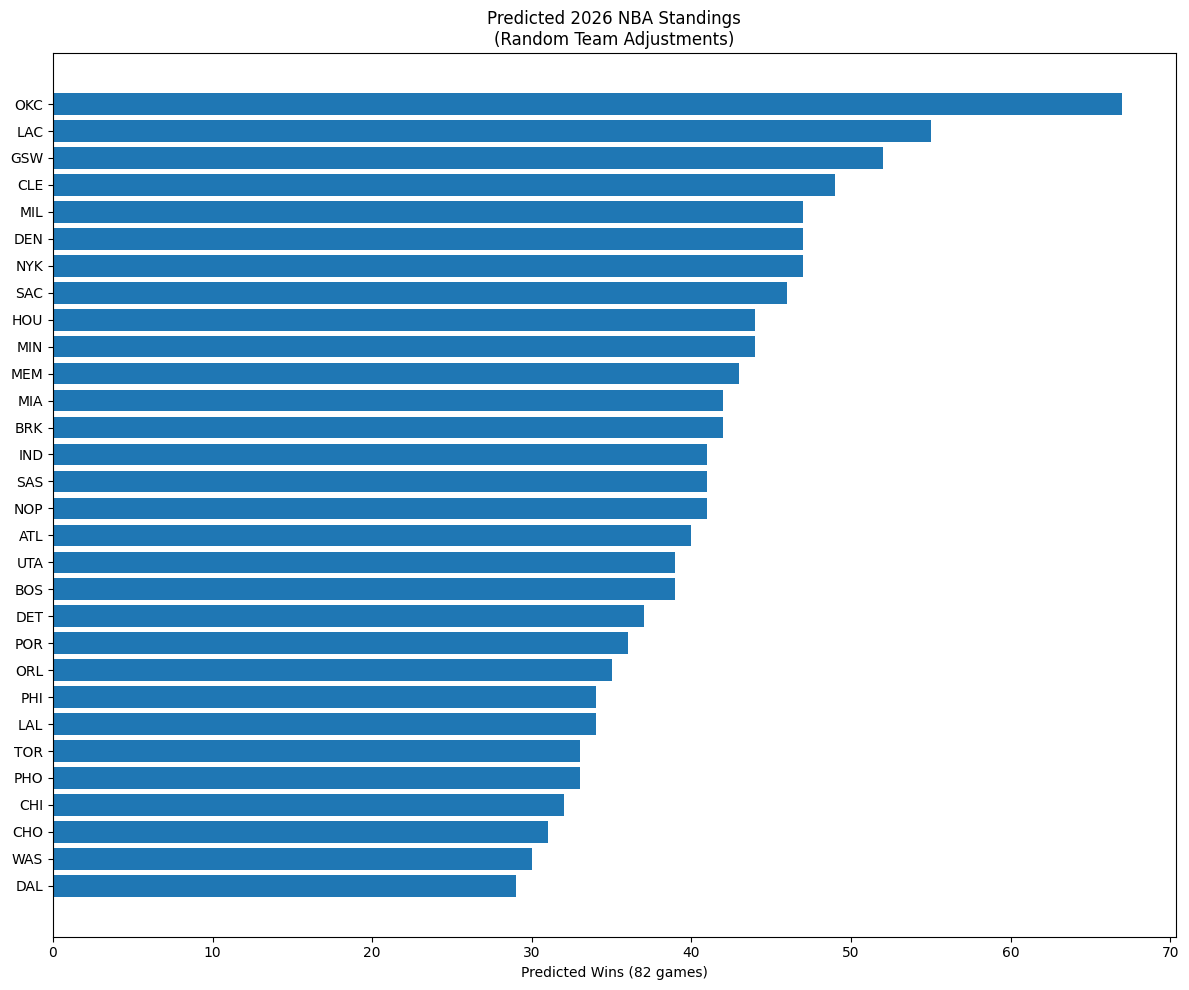

In [64]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import random

# Load predicted 2026 data
full_df_2026 = pd.read_csv('nba_full_2006_2026_predicted.csv')
nbas_data_full = full_df_2026[full_df_2026['Season'] < 2026].copy()

def predict_2026_standings_random_adjust(ols_model):
    """
    Predict W% → Wins, then RANDOM team adjustment until W=615, L=615
    """
    # Filter 2026 predicted player stats (SAME as training)
    nbas_2026 = full_df_2026[full_df_2026['Season'] == 2026].copy()
    nbas_2026['MP'] = pd.to_numeric(nbas_2026['MP'], errors='coerce')
    nbas_2026 = nbas_2026[nbas_2026['MP'] >= 5].copy()

    stat_cols = ['MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%',
                 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
                 'BLK', 'TOV', 'PF', 'PTS']

    # Ensure numeric
    for col in stat_cols:
        nbas_2026[col] = pd.to_numeric(nbas_2026[col], errors='coerce')

    # Award columns
    award_cols = ['MVP-1', 'DPOY-1', 'ALL-NBA-1','TMVP-1','TDPOY-1']
    for col in award_cols:
        if col in nbas_2026.columns:
            nbas_2026[col] = pd.to_numeric(nbas_2026[col], errors='coerce').fillna(0).astype(int)
        else:
            nbas_2026[col] = 0

    # Normalize using historical ranges
    for col in stat_cols:
        min_val, max_val = nbas_data_full[col].min(), nbas_data_full[col].max()
        if max_val > min_val:
            nbas_2026[f'{col}_norm'] = (nbas_2026[col] - min_val) / (max_val - min_val)
        else:
            nbas_2026[f'{col}_norm'] = 0.0

    # Aggregate to team-season
    agg_dict = {f'{col}_norm': 'mean' for col in stat_cols}
    agg_dict.update({col: 'max' for col in award_cols})

    team_stats_2026 = (
        nbas_2026
        .groupby(['Team', 'Season'])
        .agg(agg_dict)
        .reset_index()
    )

    # Features
    feat_norm = [f'{col}_norm' for col in stat_cols]
    feat_awards = award_cols
    feature_cols = feat_norm + feat_awards

    X_2026 = team_stats_2026[feature_cols].fillna(0)

    # **PREDICT W%**
    X_2026_sm = sm.add_constant(X_2026)
    win_pct_pred = ols_model.predict(X_2026_sm)

    # **W% × 82 → ROUND**
    team_stats_2026['W%_predicted'] = win_pct_pred
    team_stats_2026['W_pred'] = (win_pct_pred * 82).round(0).astype(int)
    team_stats_2026['L_pred'] = 82 - team_stats_2026['W_pred']

    # **RANDOM ADJUSTMENT until perfect balance**
    target_total = 1230
    total_wins = team_stats_2026['W_pred'].sum()

    adjustment_log = []

    while total_wins != target_total:
        diff = target_total - total_wins

        # **RANDOMLY select ONE team**
        if diff > 0:  # Need +1 win
            team_idx = random.randint(0, len(team_stats_2026)-1)
            team_name = team_stats_2026.iloc[team_idx]['Team']
            team_stats_2026.at[team_stats_2026.index[team_idx], 'W_pred'] += 1
            team_stats_2026.at[team_stats_2026.index[team_idx], 'L_pred'] -= 1
            adjustment_log.append(f"+1W to {team_name}")

        else:  # Need -1 win
            team_idx = random.randint(0, len(team_stats_2026)-1)
            team_name = team_stats_2026.iloc[team_idx]['Team']
            team_stats_2026.at[team_stats_2026.index[team_idx], 'W_pred'] -= 1
            team_stats_2026.at[team_stats_2026.index[team_idx], 'L_pred'] += 1
            adjustment_log.append(f"-1W from {team_name}")

        total_wins = team_stats_2026['W_pred'].sum()
        print(f"   Step: W={total_wins}, L={team_stats_2026['L_pred'].sum()}")

    # Final formatting
    team_stats_2026['W-L_pred'] = (team_stats_2026['W_pred'].astype(str) + '-' +
                                  team_stats_2026['L_pred'].astype(str))

    print(f"\n✅ VERIFICATION PASSED:")
    print(f"   Total Wins:  {team_stats_2026['W_pred'].sum():3d} ✓")
    print(f"   Total Losses: {team_stats_2026['L_pred'].sum():3d} ✓")
    print(f"   Adjustments made: {len(adjustment_log)}")

    return team_stats_2026.sort_values('W_pred', ascending=False), adjustment_log

# **RUN RANDOM ADJUSTMENT PREDICTION**
print("🔮 Predicting 2026 NBA Standings (Random Team Adjustment)")
team_predictions_2026, adjustments = predict_2026_standings_random_adjust(ols_model)

print("\n🏆 PREDICTED 2026 NBA STANDINGS")
print("=" * 70)
display_df = team_predictions_2026[['Team', 'W%_predicted', 'W_pred', 'L_pred', 'W-L_pred']].round(2)
print(display_df)

print(f"\n🎲 RANDOM ADJUSTMENTS ({len(adjustments)} total):")
for i, adj in enumerate(adjustments[-5:], 1):  # Last 5 adjustments
    print(f"   {len(adjustments)-5+i}. {adj}")

# Save results
team_predictions_2026.to_csv('2026_nba_standings_random_adjust.csv', index=False)
print("\n💾 Saved to 2026_nba_standings_random_adjust.csv")

# Bar chart
plt.figure(figsize=(12, 10))
plt.barh(range(len(team_predictions_2026)), team_predictions_2026['W_pred'])
plt.yticks(range(len(team_predictions_2026)), team_predictions_2026['Team'])
plt.xlabel('Predicted Wins (82 games)')
plt.title('Predicted 2026 NBA Standings\n(Random Team Adjustments)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()



## **The code below are our firsts attempts at modeling that didn't make it to the final code. There's no need to examine it we just wanted to keep a trace of our early work, it isn't running**


In [20]:
#Iniating True Shooting percentage TS% to measure a team efficiency
#nbas_data_full['TS%']=nbas_data_full['PTS']/(2*(nbas_data_full['FGA']+0.44*nbas_data_full['FTA']))
#Creating stats "Per 36 minutes"
# We need to normalize the time played per player
#min_played_col='MP'
#stats_to_normalize = [
 #   'PTS', 'AST', 'TRB', 'STL', 'BLK', # Positive Stats
  #  'TOV', 'PF' # Negative Stats
#]

#print(f"Normalisation using'{min_played_col}")
#for stat in stats_to_normalize:
   # new_col_name = f"{stat}_per_36"

    #For every stats, the formule is : (stat / time played) * 36
    # To avoid a zero division we have to use .replace(0,1)
   # nbas_data_full[new_col_name] = (nbas_data_full[stat] / nbas_data_full[min_played_col].replace(0, 1)) * 36
#print("Stats 'per 36 minutes' créées.")
#print(nbas_data_full[['Player','Season', min_played_col, 'PTS', 'PTS_per_36','TS%']].head())

In [21]:
# ---3. Agregate effeciency stats---
# we take new named columns
#stats_eff = [f"{stat}_per_36" for stat in stats_to_normalize]

# We group by season & teams & we calculate the mean of stats_eff
#team_stats_eff = nbas_data_full.groupby(['Season', 'Team'])[stats_eff].mean().reset_index()

#print("\nEffeciency mean stats per team per season:")
#display(team_stats_eff.head())


In [22]:
#First Approach using an arbitrary score
#from numpy import positive
# --- 4. Power Score Calculation ---
#team_scores = team_stats_eff[['Season', 'Team']].copy()

# Separate positive stats frome the negative ones
#positive_stats = ['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36']
#negative_stats = ['TOV_per_36', 'PF_per_36']

#For positive stats
#for col in positive_stats:
  #  min_score = team_stats_eff[col].min()
   # max_score = team_stats_eff[col].max()
    #col_score_name = f"{col}_score"
    #team_scores[col_score_name] = 1 + 5 * (team_stats_eff[col] - min_score) / (max_score - min_score)


# For negative stats
#for col in negative_stats:
 #   min_score = team_stats_eff[col].min()
  #  max_score = team_stats_eff[col].max()
   # col_score_name = f"{col}_score"
    #team_scores[col_score_name] = 1 + 5 * (max_score - team_stats_eff[col]) / (max_score - min_score)


# Calculate the general mean score
#col_score = [col for col in team_scores.columns if col.endswith('_score')]
#team_scores['Final_Power_Score'] = team_scores[col_score].mean(axis=1)
#team_scores['Final_Power_Score']=(team_scores['Final_Power_Score'])/team_scores['Final_Power_Score'].max()

# Finding the predictible winners from our model
#idx_predicts = team_scores.groupby('Season')['Final_Power_Score'].idxmax()

#pred_winner = team_scores.loc[idx_predicts]
#Actual winner of a season
#idx_winner= sts_data_full.groupby('Season')['W%'].idxmax()
#idx_winner = idx_winner.dropna()
#idx_winner=idx_winner.drop(columns=Dropst,errors='ignore')
#actual_winner=sts_data_full.loc[idx_winner]
#Merging relevant columns to make easier comparaison
#pred1=pred_winner[['Season','Team','Final_Power_Score']]
#actual1=actual_winner[['Team','W%']]
#actual1=actual1.rename(columns={'W%':'Win% of actual winner'})
#Adding actual rank
#pred1 = pred1.merge(sts_data_full[['Season','Team','Rk']],
 #                 on=['Season','Team'],
  #                how='left')


#pred1 = pred1.rename(columns={'Rk_y': 'Actual Rank'})


#Comparaison=pd.concat([pred1.reset_index(drop=True),actual1.reset_index(drop=True)],axis=1)
#Comparaison=Comparaison.rename(columns={'Rk': 'Actual Rank'})

#print("\n Winners based on our model vs actual winners:")
#print(Comparaison)


In [23]:

#Second approach using regression
#reg_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%','MVP','ALLNBA','DPOY']

#reg_stats_Per36=['PTS_per_36', 'AST_per_36', 'TRB_per_36', 'STL_per_36', 'BLK_per_36','TOV_per_36', 'PF_per_36','TS%','MVP','ALLNBA','DPOY']

#all_stats = reg_stat + [s for s in reg_stats_Per36 if s not in reg_stat] # Combine for team_stats_raw

# We normalized stat by total team game to have a team stat
#norm = nbas_data_full.copy()
#norm[reg_stat] = norm[reg_stat].mul(norm['G'], axis=0) / 82

#team_stats_norm=norm.groupby(['Season','Team'])[all_stats].sum().reset_index()
#regdf= pd.merge(team_stats_norm,sts_data_full,on=['Team','Season'])
#regdf = regdf.drop(columns=['Rk'])
#We created a dataset grouping team summed stat and their season records to facilitate the regression

# Create X1_data and X2_data from regdf for the models
#X1_data = sm.add_constant(regdf[reg_stat])
#X2_data = sm.add_constant(regdf[reg_stats_Per36])

##model1=sm.OLS(regdf['W%'],X1_data).fit()
#predict1=model1.predict(X1_data)
#prediction1 = pd.DataFrame(predict1, columns=['Predicted_W%'])

#We make a second model using stat per36 instead of regular one
##model2=sm.OLS(regdf['W%'],X2_data).fit()
#predict2=model2.predict(X2_data)
#prediction2 = pd.DataFrame(predict2, columns=['Predicted_W%'])

# Reset the index of regdf before merging to ensure proper alignment if indices are not unique
#regdf_reset = regdf.reset_index(drop=True)

# Concatenate prediction1 with the relevant columns from regdf
#result1 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction1], axis=1)
#result2 = pd.concat([regdf_reset[['Season', 'Team', 'W%']], prediction2], axis=1)


#print(model1.summary())
#print(model2.summary())

In [24]:
#mvp_stat=['PTS', 'AST', 'TRB', 'STL', 'BLK','TOV', 'PF','TS%']

#Normalize stat to better compare the coefficient
#X_mvp_raw = sm.add_constant(nbas_data_full[mvp_stat])
#X_mvp_norm = X_mvp_raw.copy()
#norm_cols = []

#for col in mvp_stat:
    #max_val = X_mvp_raw[col].max()
    #X_mvp_norm[col + '_norm'] = X_mvp_raw[col] / max_val
    #norm_cols.append(col + '_norm')

#X_mvp_normalized = X_mvp_norm[['const'] + norm_cols]

#Logistic regression of whether or not a player won an MVP based on normalized stat
#MVP1_norm = sm.Logit(nbas_data_full['MVP'], X_mvp_normalized).fit(disp=0)
#MVP_predict1_norm = MVP1_norm.predict(X_mvp_normalized)

# Use those coefficient to create a MVP score for each player
#MVP_score = nbas_data_full.copy()
#MVP_score['MVP_score'] = MVP_predict1_norm * 100  # Still scale to 0-100 for readability

# Use this MVP score to predict win%
#team_stat_mvp = MVP_score.groupby(['Season','Team'])['MVP_score'].mean().reset_index()
#MVP_reg = pd.merge(team_stat_mvp, sts_data_full, on=['Team','Season'])
#X = sm.add_constant(MVP_reg[['MVP_score']])


#model_MVP = sm.OLS(MVP_reg['W%'], X).fit()
#pred_MVP = model_MVP.predict(X)

# Results
#result = pd.concat([MVP_reg[['Season', 'Team', 'W%']], pd.Series(pred_MVP, name='pred_W%')], axis=1)

#print(MVP_score.head())
#print(MVP1_norm.summary())

In [25]:
#sorted_mvp_scores = MVP_score.sort_values(by='MVP_score', ascending=False)
#display(sorted_mvp_scores[['Player', 'Season', 'MVP_score']].head(20))

In [26]:
#Getting the actual team composition for 2025-2026

#We keep the statistics of 2025
##players_2025 = nbas_data_full[nbas_data_full['Season'] == 2025].copy()


##players_2025.head()
##roster_2026 = pd.read_csv("roster_2026.csv", sep=";") #file with 2025-2026 team composition
#merging table nba_data_full table with 2026 team composition
##players_2026 = players_2025.merge( roster_2026, on='Player', how='inner')

##print(" Team composition for the 2025-2026 season")
##print(players_2026.shape)
##players_2026.head()
##players_2026['Team'] = players_2026['Team_2026']
##players_2026['Season'] = 2026
##players_2026 = players_2026.drop(columns=['Team_2026'])
##players_2026.head()
